In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [2]:
# N holds the number of points in our total domain including the boudaries, 10 indicate a 10 by 10 square
N = 100
# Points except boundary will be (N-2)*(N-2)
rN = N - 2
# We are going to write (rN)*(rN) equations with (rN)*(rN) variables
no_of_equation = rN * rN
# Let's create a coefficient matrix of this size and fill it with zeros
coeffs = np.zeros((no_of_equation, no_of_equation))
tmp_indices = np.arange(no_of_equation)
i, j = np.meshgrid(tmp_indices, tmp_indices) # doing this for numpy advanced indexing
# Let's create a B Matrix, It's shape should be (rN*rN, 1)
b_matrix = np.zeros((rN**2, 1))
# Let's create the boundaries
bottom = left = right = np.zeros(N)
top = np.arange(N)*(100-np.arange(N))

In [3]:
# i = np.arange(N)
# j = np.arange(N)
# X, Y = np.meshgrid(i, j)
# voltage = 9*(10**9)/(np.sqrt((X-50)**2+(Y-50)**2))
# left = voltage[:, 0]
# right = voltage[:, (N-1)]
# top = voltage[(N-1), :]
# bottom = voltage[0, :]
# fig = plt.figure()
# ax = fig.gca(projection='3d')
# ax.plot_surface(X, Y, voltage)

In [4]:
coeffs

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
indices = np.arange(1, no_of_equation+1).reshape((rN, rN))

In [6]:
indices

array([[   1,    2,    3, ...,   96,   97,   98],
       [  99,  100,  101, ...,  194,  195,  196],
       [ 197,  198,  199, ...,  292,  293,  294],
       ...,
       [9311, 9312, 9313, ..., 9406, 9407, 9408],
       [9409, 9410, 9411, ..., 9504, 9505, 9506],
       [9507, 9508, 9509, ..., 9602, 9603, 9604]])

In [7]:
for i in range(rN):
    for j in range(rN):
            coeffs[indices[i][j]-1][indices[i][j]-1] = -4
            if j > 0:
                coeffs[indices[i][j]-1][indices[i][j-1]-1] = 1
            else:
                b_matrix[indices[i][j]-1] -= left[i+1]
            if j < (rN-1):
                coeffs[indices[i][j]-1][indices[i][j+1]-1] = 1
            else:
                b_matrix[indices[i][j]-1] -= right[i+1]
            if i > 0:
                coeffs[indices[i][j]-1][indices[i-1][j]-1] = 1
            else:
                b_matrix[indices[i][j]-1] -= bottom[j+1]
            if i < (rN-1):
                coeffs[indices[i][j]-1][indices[i+1][j]-1] = 1
            else:
                b_matrix[indices[i][j]-1] -= top[j+1]

In [8]:
print(coeffs)

[[-4.  1.  0. ...  0.  0.  0.]
 [ 1. -4.  1. ...  0.  0.  0.]
 [ 0.  1. -4. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -4.  1.  0.]
 [ 0.  0.  0. ...  1. -4.  1.]
 [ 0.  0.  0. ...  0.  1. -4.]]


In [9]:
Vs = np.matmul(np.linalg.inv(coeffs), b_matrix).reshape(rN, rN)

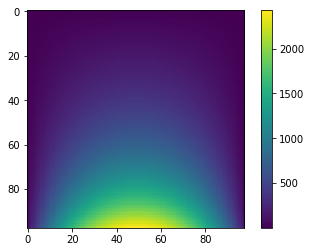

In [10]:
fig = plt.figure()
ax = plt.gca()
pos = ax.imshow(Vs)
fig.colorbar(pos, ax=ax)
plt.show()

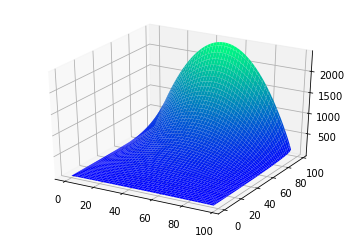

In [12]:
X, Y = np.meshgrid(np.arange(rN), np.arange(rN))
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Vs, cmap='winter')
plt.show()

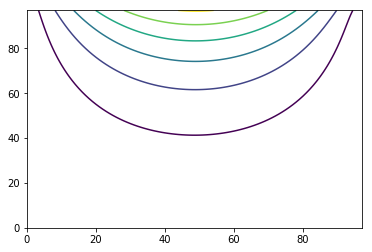

In [14]:
plt.contour(X, Y, Vs)